In [2]:
import importlib
import modules
from collections import Counter
import numpy as np

importlib.reload(modules)

from modules import CA
import matplotlib.pyplot as plt

from modules import run_model_stochastic
import random

importlib.reload(modules)

In [4]:
def kinematic_wave_model(initial_density, road_length, time_steps, dt, vmax, density_function, jam_threshold):
    """
    Kinematic Wave model for traffic flow simulation.

    Parameters:
    - initial_density: Initial density profile along the road.
    - road_length: Length of the road.
    - time_steps: Number of time steps.
    - dt: Time step size.
    - vmax: Maximum speed of vehicles.
    - density_function: Function representing the initial density profile.
    - jam_threshold: Threshold density for identifying traffic jams.

    Returns:
    - density_history: List of density profiles at each time step.
    - num_jams: List of the number of jams at each time step.
    """

    density_history = [initial_density.copy()]
    num_jams = []
    speed = np.zeros((time_steps, len(initial_density)))

    for t in range(time_steps):
        current_density = density_history[-1]

        # Calculate flow and speed
        flow = current_density * vmax
        
        speed[t] = vmax * (1 - current_density)

        # Update density using the conservation equation
        density_change = (flow[:-1] - flow[1:]) * dt / road_length
        current_density[1:] += density_change
        current_density[0] += (flow[-1] - flow[0]) * dt / road_length

        # Apply the density function for dynamic variations
        current_density = density_function(current_density)

        density_history.append(current_density.copy())

        # Identify the number of jams
        num_jam = np.sum(current_density > jam_threshold)
        num_jams.append(num_jam)

    return speed



In [32]:
density_list = np.linspace(0.3, 0.9, 100)
L = 100
T = 50
n_repetitions = 100
v_max = 5
trials = 500
shannon_entropy = {}

import itertools

for p in density_list:
    print(p)
    for n in range(trials):
        lifespan_counter, jam_counter, all_evolutions = run_model_stochastic(p, L, T, n_repetitions, v_max, return_evolutions=True)
        merged = list(itertools.chain.from_iterable(list(itertools.chain.from_iterable(all_evolutions))))
        second_items = [tuple_item[1] for tuple_item in merged]
        speeds = Counter(second_items)
        
        probabilities = [count / len(second_items) for count in speeds.values()]

        # shannon_entropy[p] += -sum(p * np.log2(p) for p in probabilities)

        if p not in shannon_entropy:
                    shannon_entropy[p] = [-sum(p * np.log2(p) for p in probabilities)]
        else:
            shannon_entropy[p] += [-sum(p * np.log2(p) for p in probabilities)]


0.3 0
0.3 1
0.3 2
0.3 3
0.3 4
0.3 5
0.3 6
0.3 7


KeyboardInterrupt: 

13.28771237954811


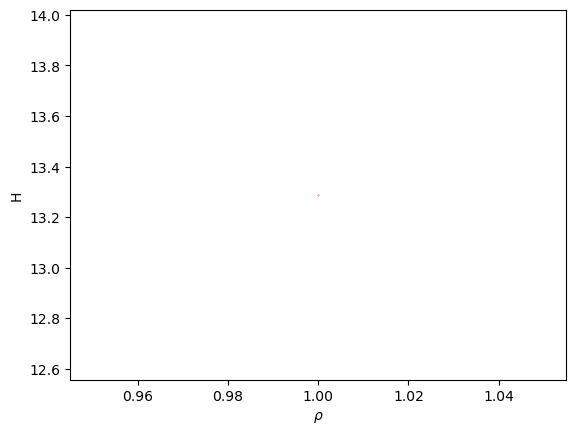

In [7]:
# Example Usage:

road_length = 10.0
time_steps = 100
dt = 0.1
vmax = 2
jam_threshold = 0.8

def density_function(density):
    # Example of a density function that adds a sinusoidal perturbation
    perturbation = np.sin(np.linspace(0, 2 * np.pi, len(density)))
    return density + perturbation

for n in range(trials):
    initial_density = np.sin(np.linspace(0, 2 * np.pi, 100))
    random.shuffle(initial_density)

    speed = kinematic_wave_model(initial_density, road_length, time_steps, dt, vmax, density_function, jam_threshold).flatten()
    counts_speed = Counter(speed)
    probabilities = [count / len(speed) for count in counts_speed.values()]

    shannon_entropy = -sum(p * np.log2(p) for p in probabilities)
    print(shannon_entropy)

    plt.plot(1, shannon_entropy, 'o', markersize=0.25, color='red')

plt.ylabel(f'H')
plt.xlabel(r'$\rho$')
plt.show()
